Topics:
1. Generate weight matrix, W, for a given data using KNN algorithm
2. Obtain adjacency matrix, A, from W
3. Obtain symmetric adjacency matrix, A_mut, using mutual KNN algorithm
4. Plotting graphs

In [1]:
# import packages
import numpy as np
from sklearn.neighbors import kneighbors_graph
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
#define functions

#a function to convert weight matrix to adjacency matrix thats entries are 0 or 1.
def get_adj_matrix(W):
    A = np.zeros(np.shape(W))
    for i in range(np.shape(W)[0]):
        for j in range(np.shape(W)[1]):
            if W[i, j] != 0:
                A[i, j] = 1
    return A


# a function to plot graph from adjacency matrix
def show_graph_with_labels(adjacency_matrix, mylabels):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, labels=mylabels, with_labels=True)
    plt.show()

#### 1. Generate weight matrix, W, from a given data using KNN algorithm 
Suppose there is a given data X, we want to generate KNN graph for this data using Euclidean measure. The number of neighbors is assumed 3, that means for each node, there will be two other nodes in relation, i.e., each row in the weight or adjacency matrix there are two non-zero values.

In [3]:
X = [[0], [1], [7], [8], [9]]
X = np.array(X)

mat = kneighbors_graph(X, 3, mode='distance', include_self=True)
W=mat.todense()
print(f'W matrix from kNN:\n {W}')
A = get_adj_matrix(W)
print(f'A matrix from kNN:\n {A}')

W matrix from kNN:
 [[0. 1. 7. 0. 0.]
 [1. 0. 6. 0. 0.]
 [0. 0. 0. 1. 2.]
 [0. 0. 1. 0. 1.]
 [0. 0. 2. 1. 0.]]
A matrix from kNN:
 [[0. 1. 1. 0. 0.]
 [1. 0. 1. 0. 0.]
 [0. 0. 0. 1. 1.]
 [0. 0. 1. 0. 1.]
 [0. 0. 1. 1. 0.]]


#### 2. Obtain adjacency matrix, A, from W
For generating adjacency matrix from weight matrix I have used a function called *get_adj_matrix(.)*

In [4]:
A = get_adj_matrix(W)
A

array([[0., 1., 1., 0., 0.],
       [1., 0., 1., 0., 0.],
       [0., 0., 0., 1., 1.],
       [0., 0., 1., 0., 1.],
       [0., 0., 1., 1., 0.]])

#### 3. Obtain symmetric adjacency matrix, A_mut, using mutual kNN algorithm
In orther to obtain symmetric adjacency matrix, A_mut, it is enough to generate $A^{'}$ and use the following equation:<br>
$\hat{A} = min(A, A^{'})$

In [5]:
AT = A.transpose()
A_mut = np.minimum(A, AT)
A_mut

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1.],
       [0., 0., 1., 0., 1.],
       [0., 0., 1., 1., 0.]])

Now we see that A_mut is symmetric.

#### 4. Plotting graphs:
##### 4.1 KNN graph before symmetrizing:

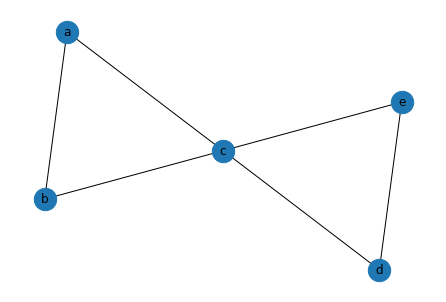

In [6]:
show_graph_with_labels(A, {0:'a', 1:'b', 2:'c', 3:'d', 4:'e'})

##### 4.2 mutKNN graph after symmetrizing

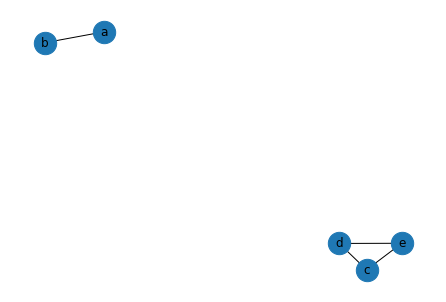

In [7]:
show_graph_with_labels(A_mut, {0:'a', 1:'b', 2:'c', 3:'d', 4:'e'})